# K-means clustering v-3
* Generated with original dataset after feature engineering on categorical feature. 
* **No** new feature generated based on ClickedBanner, AddedToBasket, Purchased
* Heat Map

In [84]:
import numpy as np
# from scipy.cluster.hierarchy import dendrogram, linkage  
# from scipy.spatial.distance import euclidean
# from scipy.spatial.distance import pdist,squareform
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
# plt.style.use('ggplot')
# import seaborn as sns
# sns.set()
# from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
# from collections import defaultdict
# from sklearn.metrics import silhouette_score
# from itertools import combinations
pd.set_option('display.max_columns', None)

from sklearn.decomposition import PCA

In [4]:
data = pd.read_csv('../data/dataforkmeans_v1.csv')

In [6]:
data.head()

,VisitDate,UniqueVisitID,ViewedProductInVisit,ViewedSaleInVisit,TotalPageViews,PlacedSearch,SecondsOnSite,ClickedBanner,AddedToBasket,Purchased,PirorVisitPur,NewVisit,PirorVisit,PlatformWeb,PlatformPhone,ThroughAds,ThroughEmail,ThroughWS,Chrome,Safari,MicsEdge,MacX,iOS,Windows,Chrome OS,Android,Other/Unknown,Linux,Sex_Female,Sex_Male,IR_100to250k,IR_50to100k,IR_Under50k,Eastern,West_Coast,Mid_West,South_West,Other
0,7/1/2017,2014237601010030,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0
1,7/1/2017,6875972920873110,1,1,8,1,430,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
2,7/1/2017,43601232830137300,1,0,26,1,2785,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
3,7/1/2017,92348156703921600,0,0,11,0,7143,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0
4,7/1/2017,116514741139866000,1,0,78,0,5813,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0


In [7]:
data = data.set_index('UniqueVisitID')
data = data.drop('VisitDate', axis=1)

# Elbow Method

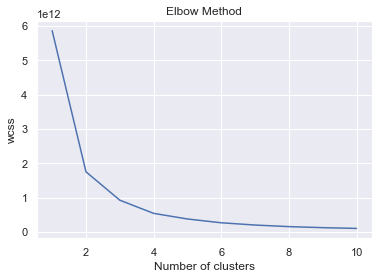

CPU times: user 3min 46s, sys: 24.5 s, total: 4min 10s
Wall time: 4min 2s


In [8]:
%%time
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++', max_iter=3000, precompute_distances='auto',
                n_init=10,copy_x=True,n_jobs= -1)
    km.fit(data)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

### Based on the plot above, the elbow is 2, I would try k = 2 & k=3 & k=4

In [9]:
kmeans_2 = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300000,
    n_clusters=2, n_jobs= -1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
kmeans_3 = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300000,
    n_clusters=3, n_jobs= -1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
kmeans_4 = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300000,
    n_clusters=4, n_jobs= -1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

**k=2**

In [10]:
# k = 2
data2 = data
y_2 = kmeans_2.fit_predict(data2)

data2['cluster'] = y_2
data2_summary = data2.groupby('cluster').sum()
data2_summary_mean = data2.groupby('cluster').mean()

In [11]:
data2_summary

,ViewedProductInVisit,ViewedSaleInVisit,TotalPageViews,PlacedSearch,SecondsOnSite,ClickedBanner,AddedToBasket,Purchased,PirorVisitPur,NewVisit,PirorVisit,PlatformWeb,PlatformPhone,ThroughAds,ThroughEmail,ThroughWS,Chrome,Safari,MicsEdge,MacX,iOS,Windows,Chrome OS,Android,Other/Unknown,Linux,Sex_Female,Sex_Male,IR_100to250k,IR_50to100k,IR_Under50k,Eastern,West_Coast,Mid_West,South_West,Other
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,193614,54351,4800877,139975,312803206,17338,52103,17359,298190,5680,25140,177162,151848,91191,101424,136395,138610,171197,19203,47557,144041,81662,2650,52884,38,178,267444,61566,128916,123588,60229,191444,42983,55285,29376,667
1,37116,12226,2070525,26307,469883633,2987,16513,5395,36153,663,3567,21066,19317,9806,16122,14455,16217,22637,1529,7168,18687,9032,309,5175,0,12,32887,7496,16525,15198,7275,23014,5603,6758,3938,86


In [12]:
data2_summary_mean

,ViewedProductInVisit,ViewedSaleInVisit,TotalPageViews,PlacedSearch,SecondsOnSite,ClickedBanner,AddedToBasket,Purchased,PirorVisitPur,NewVisit,PirorVisit,PlatformWeb,PlatformPhone,ThroughAds,ThroughEmail,ThroughWS,Chrome,Safari,MicsEdge,MacX,iOS,Windows,Chrome OS,Android,Other/Unknown,Linux,Sex_Female,Sex_Male,IR_100to250k,IR_50to100k,IR_Under50k,Eastern,West_Coast,Mid_West,South_West,Other
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.588475,0.165196,14.591888,0.425443,950.740725,0.052697,0.158363,0.052761,0.906325,0.017264,0.076411,0.538470,0.461530,0.277168,0.308270,0.414562,0.421294,0.520340,0.058366,0.144546,0.437801,0.248205,0.008054,0.160737,0.000115,0.000541,0.812875,0.187125,0.391830,0.375636,0.183061,0.581879,0.130643,0.168034,0.089286,0.002027
1,0.919100,0.302751,51.272194,0.651437,11635.679197,0.073967,0.408910,0.133596,0.895253,0.016418,0.088329,0.521655,0.478345,0.242825,0.399227,0.357948,0.401580,0.560558,0.037862,0.177500,0.462744,0.223658,0.007652,0.128148,0.000000,0.000297,0.814377,0.185623,0.409207,0.376346,0.180150,0.569893,0.138747,0.167348,0.097516,0.002130


**k = 3** 

In [14]:
data=data.drop('cluster',axis=1)
data3 = data
y_3 = kmeans_3.fit_predict(data3)
data3['cluster'] = y_3
data3_summary = data3.groupby('cluster').sum()
data3_summary_mean = data3.groupby('cluster').mean()

In [15]:
data3_summary

,ViewedProductInVisit,ViewedSaleInVisit,TotalPageViews,PlacedSearch,SecondsOnSite,ClickedBanner,AddedToBasket,Purchased,PirorVisitPur,NewVisit,PirorVisit,PlatformWeb,PlatformPhone,ThroughAds,ThroughEmail,ThroughWS,Chrome,Safari,MicsEdge,MacX,iOS,Windows,Chrome OS,Android,Other/Unknown,Linux,Sex_Female,Sex_Male,IR_100to250k,IR_50to100k,IR_Under50k,Eastern,West_Coast,Mid_West,South_West,Other
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,42402,13244,1941523,29348,371401717,3188,17654,5812,41805,781,4193,24938,21841,11660,17885,17234,19002,25897,1880,8395,21201,10718,360,6089,0,16,38059,8720,19065,17570,8450,26784,6439,7820,4530,94
1,179072,49922,4155452,130000,228967710,16299,45913,15227,284020,5387,23640,168276,144771,87200,95657,130190,131950,162617,18480,44631,137096,77807,2522,50782,38,171,254488,58559,122471,117629,57308,182247,40789,52626,27845,642
2,9256,3411,774427,6934,182317412,838,5049,1715,8518,175,874,5014,4553,2137,4004,3426,3875,5320,372,1699,4431,2169,77,1188,0,3,7784,1783,3905,3587,1746,5427,1358,1597,939,17


In [16]:
data3_summary_mean

,ViewedProductInVisit,ViewedSaleInVisit,TotalPageViews,PlacedSearch,SecondsOnSite,ClickedBanner,AddedToBasket,Purchased,PirorVisitPur,NewVisit,PirorVisit,PlatformWeb,PlatformPhone,ThroughAds,ThroughEmail,ThroughWS,Chrome,Safari,MicsEdge,MacX,iOS,Windows,Chrome OS,Android,Other/Unknown,Linux,Sex_Female,Sex_Male,IR_100to250k,IR_50to100k,IR_Under50k,Eastern,West_Coast,Mid_West,South_West,Other
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.906432,0.283118,41.504158,0.627376,7939.496719,0.068150,0.377392,0.124244,0.893670,0.016696,0.089634,0.533102,0.466898,0.249257,0.382330,0.368413,0.406208,0.553603,0.040189,0.179461,0.453216,0.229120,0.007696,0.130165,0.000000,0.000342,0.813592,0.186408,0.407555,0.375596,0.180637,0.572565,0.137647,0.167169,0.096838,0.002009
1,0.572029,0.159471,13.274211,0.415273,731.416401,0.052066,0.146665,0.048641,0.907276,0.017208,0.075516,0.537542,0.462458,0.278552,0.305568,0.415880,0.421502,0.519465,0.059033,0.142570,0.437941,0.248547,0.008056,0.162218,0.000121,0.000546,0.812939,0.187061,0.391222,0.375755,0.183065,0.582171,0.130297,0.168109,0.088948,0.002051
2,0.967492,0.356538,80.947737,0.724783,19056.905195,0.087593,0.527752,0.179262,0.890352,0.018292,0.091356,0.524093,0.475907,0.223372,0.418522,0.358106,0.405038,0.556078,0.038884,0.177590,0.463155,0.226717,0.008049,0.124177,0.000000,0.000314,0.813630,0.186370,0.408174,0.374935,0.182502,0.567262,0.141946,0.166928,0.098150,0.001777


**k=4**

In [17]:
data=data.drop('cluster',axis=1)
data4 = data
data4['cluster'] = kmeans_4.fit_predict(data4)
data4_summary = data4.groupby('cluster').sum()
data4_summary_mean = data4.groupby('cluster').mean()

In [18]:
data4_summary

,ViewedProductInVisit,ViewedSaleInVisit,TotalPageViews,PlacedSearch,SecondsOnSite,ClickedBanner,AddedToBasket,Purchased,PirorVisitPur,NewVisit,PirorVisit,PlatformWeb,PlatformPhone,ThroughAds,ThroughEmail,ThroughWS,Chrome,Safari,MicsEdge,MacX,iOS,Windows,Chrome OS,Android,Other/Unknown,Linux,Sex_Female,Sex_Male,IR_100to250k,IR_50to100k,IR_Under50k,Eastern,West_Coast,Mid_West,South_West,Other
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,44727,13643,1900603,30634,230407604,3375,18744,6308,43640,974,4543,27269,21888,12326,17819,19012,20649,26235,2273,8940,21260,11853,391,6688,0,25,39962,9195,19743,18431,9058,28289,6751,8196,4627,101
1,5039,1942,491970,3858,116998170,493,2867,940,4634,90,475,2620,2579,1154,2221,1824,2134,2881,184,870,2456,1164,46,663,0,0,4238,961,2046,2001,978,2938,771,862,511,9
2,157244,43327,3277811,115172,148068461,14629,36804,12163,262871,4872,21397,154745,134395,81173,87170,120797,121689,150154,17297,40293,127049,71875,2312,47417,38,156,235081,54059,112861,108712,52878,168465,37503,48668,25629,590
3,23720,7665,1201018,16618,287212604,1828,10201,3343,23198,407,2292,13594,12303,6344,10336,9217,10355,14564,978,4622,11963,5802,210,3291,0,9,21050,4847,10791,9642,4590,14766,3561,4317,2547,53


In [19]:
data4_summary_mean

,ViewedProductInVisit,ViewedSaleInVisit,TotalPageViews,PlacedSearch,SecondsOnSite,ClickedBanner,AddedToBasket,Purchased,PirorVisitPur,NewVisit,PirorVisit,PlatformWeb,PlatformPhone,ThroughAds,ThroughEmail,ThroughWS,Chrome,Safari,MicsEdge,MacX,iOS,Windows,Chrome OS,Android,Other/Unknown,Linux,Sex_Female,Sex_Male,IR_100to250k,IR_50to100k,IR_Under50k,Eastern,West_Coast,Mid_West,South_West,Other
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.909881,0.277539,38.663934,0.623187,4687.177899,0.068658,0.381309,0.128324,0.887768,0.019814,0.092418,0.554733,0.445267,0.250748,0.362492,0.386761,0.420062,0.533698,0.046240,0.181866,0.432492,0.241125,0.007954,0.136054,0.000000,0.000509,0.812946,0.187054,0.401632,0.374942,0.184267,0.575483,0.137335,0.166731,0.094127,0.002055
1,0.969225,0.373533,94.627813,0.742066,22503.975765,0.094826,0.551452,0.180804,0.891325,0.017311,0.091364,0.503943,0.496057,0.221966,0.427198,0.350837,0.410464,0.554145,0.035391,0.167340,0.472399,0.223889,0.008848,0.127525,0.000000,0.000000,0.815157,0.184843,0.393537,0.384882,0.188113,0.565109,0.148298,0.165801,0.098288,0.001731
2,0.543833,0.149848,11.336415,0.398326,512.099540,0.050595,0.127288,0.042066,0.909148,0.016850,0.074002,0.535191,0.464809,0.280739,0.301480,0.417780,0.420865,0.519312,0.059822,0.139355,0.439403,0.248582,0.007996,0.163993,0.000131,0.000540,0.813035,0.186965,0.390333,0.375984,0.182880,0.582642,0.129705,0.168320,0.088639,0.002041
3,0.915936,0.295980,46.376723,0.641696,11090.574352,0.070587,0.393907,0.129088,0.895779,0.015716,0.088504,0.524926,0.475074,0.244970,0.399120,0.355910,0.399853,0.562382,0.037765,0.178476,0.461945,0.224041,0.008109,0.127080,0.000000,0.000348,0.812835,0.187165,0.416689,0.372321,0.177241,0.570182,0.137506,0.166699,0.098351,0.002047


In [24]:
data=data.drop('cluster',axis=1)

# HeatMap

**heatmap on data without labeled cluster**

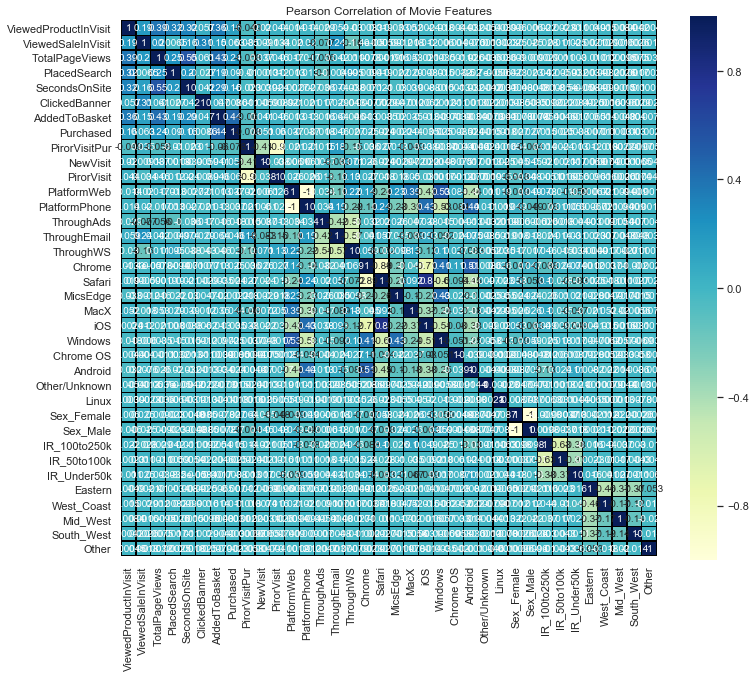

In [27]:
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of Movie Features')
# Draw the heatmap using seaborn
sns.heatmap(data.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

# Visualization on K-means

**when k =2**

In [38]:
from mpl_toolkits import mplot3d
# magic function for interactive plot
%matplotlib notebook


In [101]:
pca = PCA(n_components=3)
data2_3d = pca.fit_transform(data2)

In [67]:
np.unique(X_clustered)

array([0, 1], dtype=int32)

In [102]:
kmeansv2 = KMeans(n_clusters=2)
# Compute cluster centers and predict cluster indices
X_clustered2 = kmeansv2.fit_predict(data2_3d)

In [103]:
centroids2 = kmeansv2.cluster_centers_

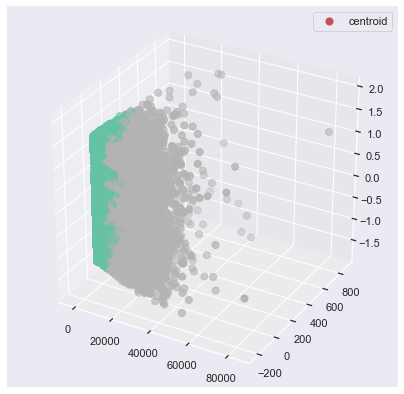

In [104]:

plt.figure('K-Means cluster', figsize=(10,7))
ax = plt.axes(projection = '3d')
ax.scatter(data2_3d[:,0],data2_3d[:,1],data2_3d[:,2], c=X_clustered2 , cmap='Set2', s=50)
ax.scatter(centroids2[0,0],centroids2[0,1],centroids2[0,2] ,c='r', s=50, label='centroid')
ax.scatter(centroids2[1,0],centroids2[1,1],centroids2[1,2] ,c='r', s=50)
# ax.scatter(centroids[2,3],centroids[2,0],centroids[2,2] ,c='r', s=50)

ax.legend()
# plt.show()

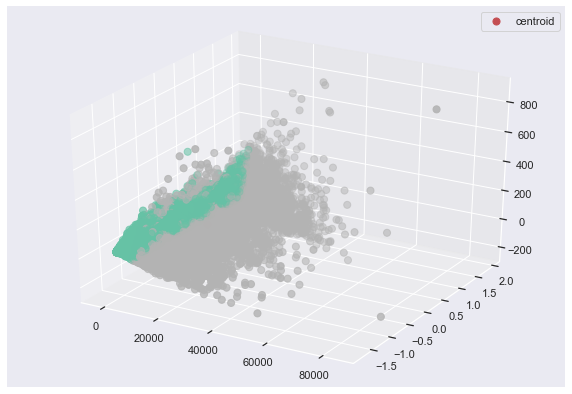

In [106]:
plt.figure('K-Means cluster K = 2', figsize=(10,7))
ax = plt.axes(projection = '3d')
ax.scatter(data2_3d[:,0],data2_3d[:,2],data2_3d[:,1], c=X_clustered2 , cmap='Set2', s=50)
ax.scatter(centroids2[0,0],centroids2[0,2],centroids2[0,1] ,c='r', s=50, label='centroid')
ax.scatter(centroids2[1,0],centroids2[1,2],centroids2[1,1] ,c='r', s=50)
ax.legend()

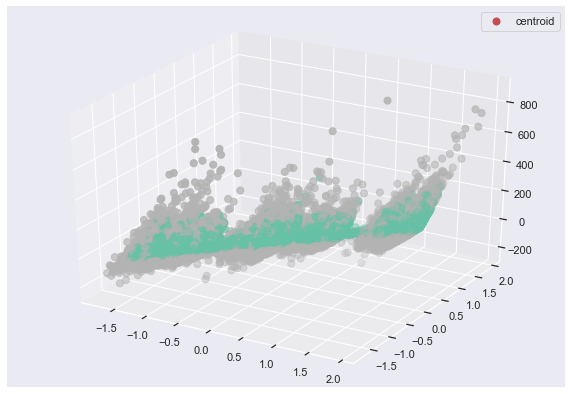

In [107]:
plt.figure('K-Means cluster K = 2', figsize=(10,7))
ax = plt.axes(projection = '3d')
ax.scatter(data2_3d[:,2],data2_3d[:,2],data2_3d[:,1], c=X_clustered2 , cmap='Set2', s=50)
ax.scatter(centroids2[0,2],centroids2[0,2],centroids2[0,1] ,c='r', s=50, label='centroid')
ax.scatter(centroids2[1,2],centroids2[1,2],centroids2[1,1] ,c='r', s=50)
# ax.scatter(centroids3[2,0],centroids3[2,1],centroids3[2,2] ,c='r', s=50)

ax.legend()

**k =3**

In [108]:
pca = PCA(n_components=3)
data3_3d = pca.fit_transform(data3)

In [109]:
kmeansv3 = KMeans(n_clusters=3)
# Compute cluster centers and predict cluster indices
X_clustered3 = kmeansv3.fit_predict(data3_3d)

In [110]:
centroids3 = kmeansv3.cluster_centers_

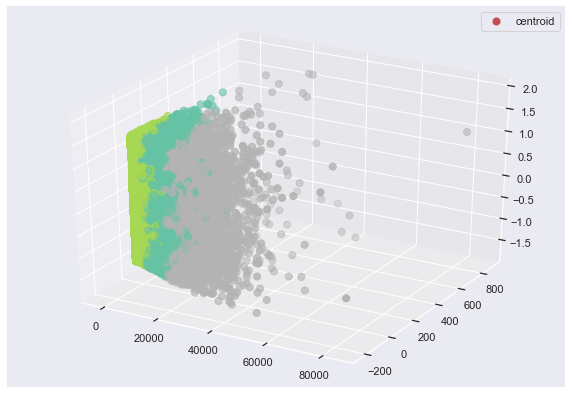

In [111]:
plt.figure('K-Means cluster K = 3', figsize=(10,7))
ax = plt.axes(projection = '3d')
ax.scatter(data3_3d[:,0],data3_3d[:,1],data3_3d[:,2], c=X_clustered3 , cmap='Set2', s=50)
ax.scatter(centroids3[0,0],centroids3[0,1],centroids3[0,2] ,c='r', s=50, label='centroid')
ax.scatter(centroids3[1,0],centroids3[1,1],centroids3[1,2] ,c='r', s=50)
ax.scatter(centroids3[2,0],centroids3[2,1],centroids3[2,2] ,c='r', s=50)

ax.legend()
# plt.show()

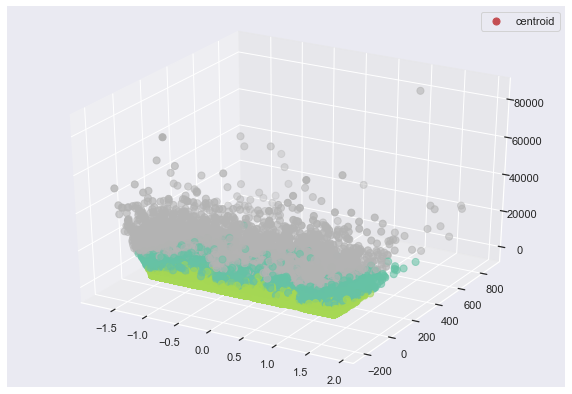

In [112]:
plt.figure('K-Means cluster K = 3', figsize=(10,7))
ax = plt.axes(projection = '3d')
ax.scatter(data3_3d[:,2],data3_3d[:,1],data3_3d[:,0], c=X_clustered3 , cmap='Set2', s=50)
ax.scatter(centroids3[0,2],centroids3[0,1],centroids3[0,0] ,c='r', s=50, label='centroid')
ax.scatter(centroids3[1,2],centroids3[1,1],centroids3[1,0] ,c='r', s=50)
ax.scatter(centroids3[2,2],centroids3[2,1],centroids3[2,0] ,c='r', s=50)

ax.legend()

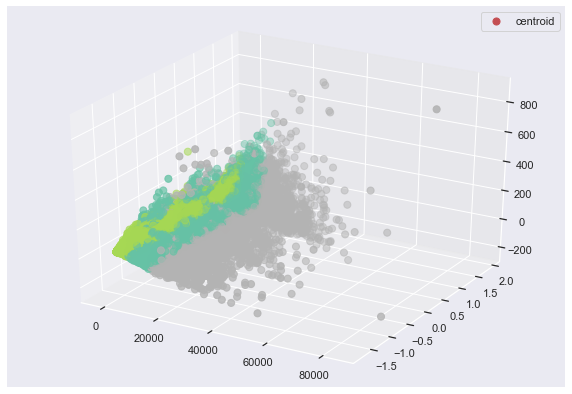

In [113]:

plt.figure('K-Means cluster K = 3', figsize=(10,7))
ax = plt.axes(projection = '3d')
ax.scatter(data3_3d[:,0],data3_3d[:,2],data3_3d[:,1], c=X_clustered3 , cmap='Set2', s=50)
ax.scatter(centroids3[0,0],centroids3[0,2],centroids3[0,1] ,c='r', s=50, label='centroid')
ax.scatter(centroids3[1,0],centroids3[1,2],centroids3[1,1] ,c='r', s=50)
ax.scatter(centroids3[2,0],centroids3[2,2],centroids3[2,1] ,c='r', s=50)

ax.legend()